# Exploratory Data Analysis - Retail
## **by Sravani Ponakalapalli**

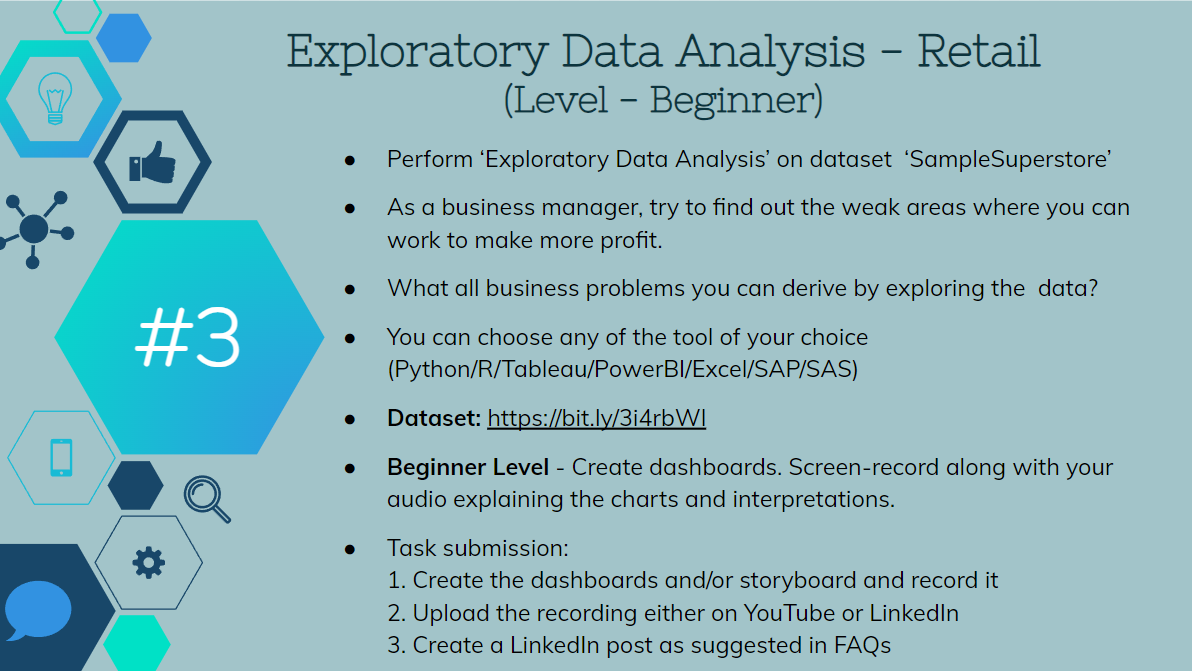

In [3]:
Image(r"C:\Users\PHOENIX\OneDrive\Desktop\retail snap.png")

### Data Processing and Analysis Operations

In [2]:
# load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

In [3]:
# loading and previewing dataset
data = pd.read_csv(r"C:\Users\PHOENIX\OneDrive\Desktop\CSV Files\SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# understanding the dataset dimensions
data.shape

(9994, 13)

In [5]:
# checking for missing values in the dataset
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
# summary of the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# summary statistics of the dataset
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# removing redundant columns from the dataset
data.drop(["Country","Postal Code"],axis=1,inplace=True)

In [9]:
# previewing the dataset after removing the redundant columns
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
# calculating total sales and profit
print(f"Total Sales: {data["Sales"].sum()}")
print(f"Total Profit: {data["Profit"].sum()}")

Total Sales: 2297200.8603000003
Total Profit: 286397.0217


In [11]:
# counting duplicate rows in the dataset
data.duplicated().sum()

50

In [12]:
# removing duplicate rows from the dataset
data.drop_duplicates(inplace=True)

In [13]:
# verifying duplicate rows after removal
data.duplicated().sum()

0

### Data visualization

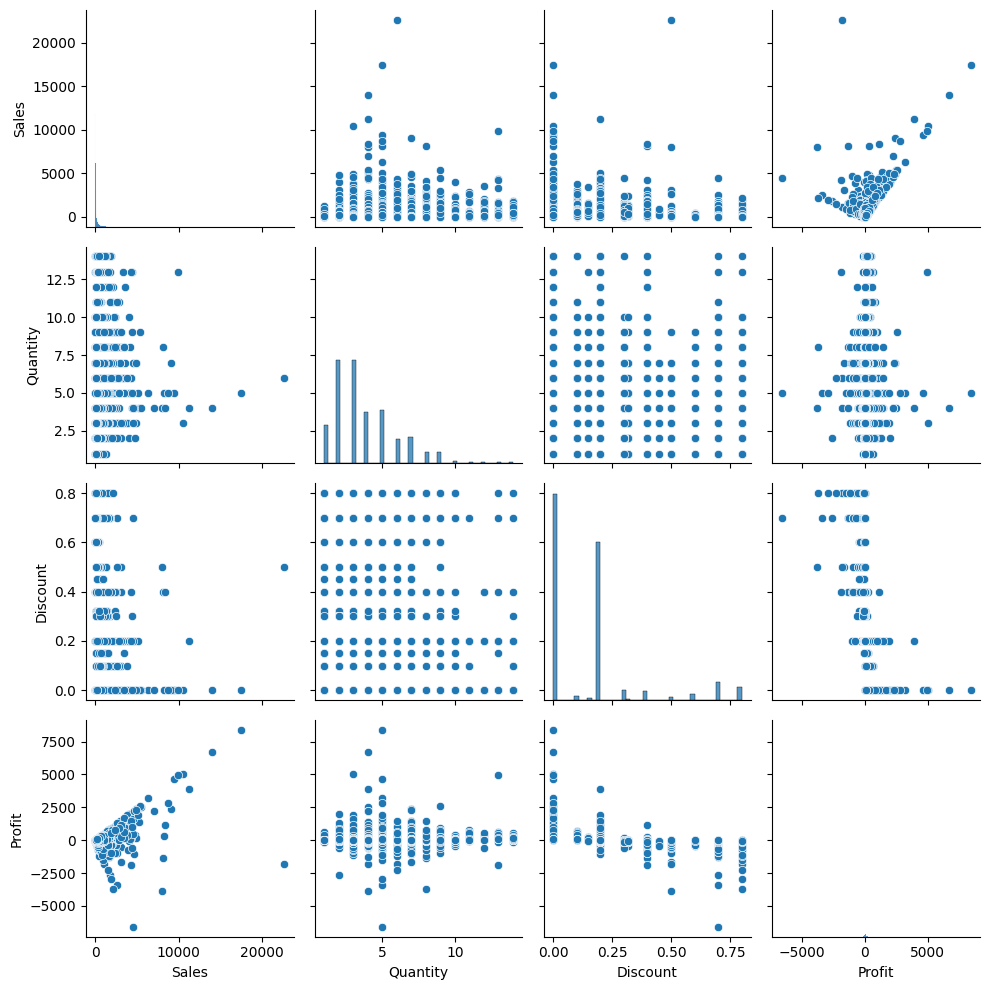

In [14]:
# pairwise relationships visualization
sns.pairplot(data)
plt.tight_layout()

* As Discount increases Profit decreases* 
As Discount increases Sales decreas
*  
As Sales increase Profit increases

In [15]:
data1 = data.drop(["Ship Mode","Segment","City","State","Region","Category","Sub-Category"],axis=1)	

In [16]:
# calculating correlation matrix
data1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


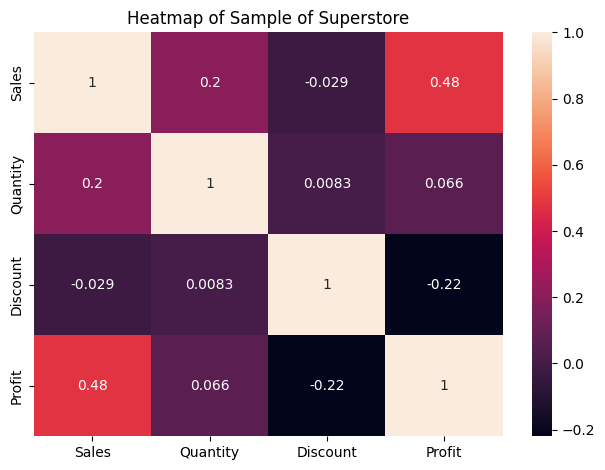

In [17]:
# visualizing correlation with heatmap
sns.heatmap(data1.corr(),annot=True)
plt.title("Heatmap of Sample of Superstore")
plt.tight_layout()

* Most correlation: Sales and Profit* 
Least correlation: Discount and Quantity

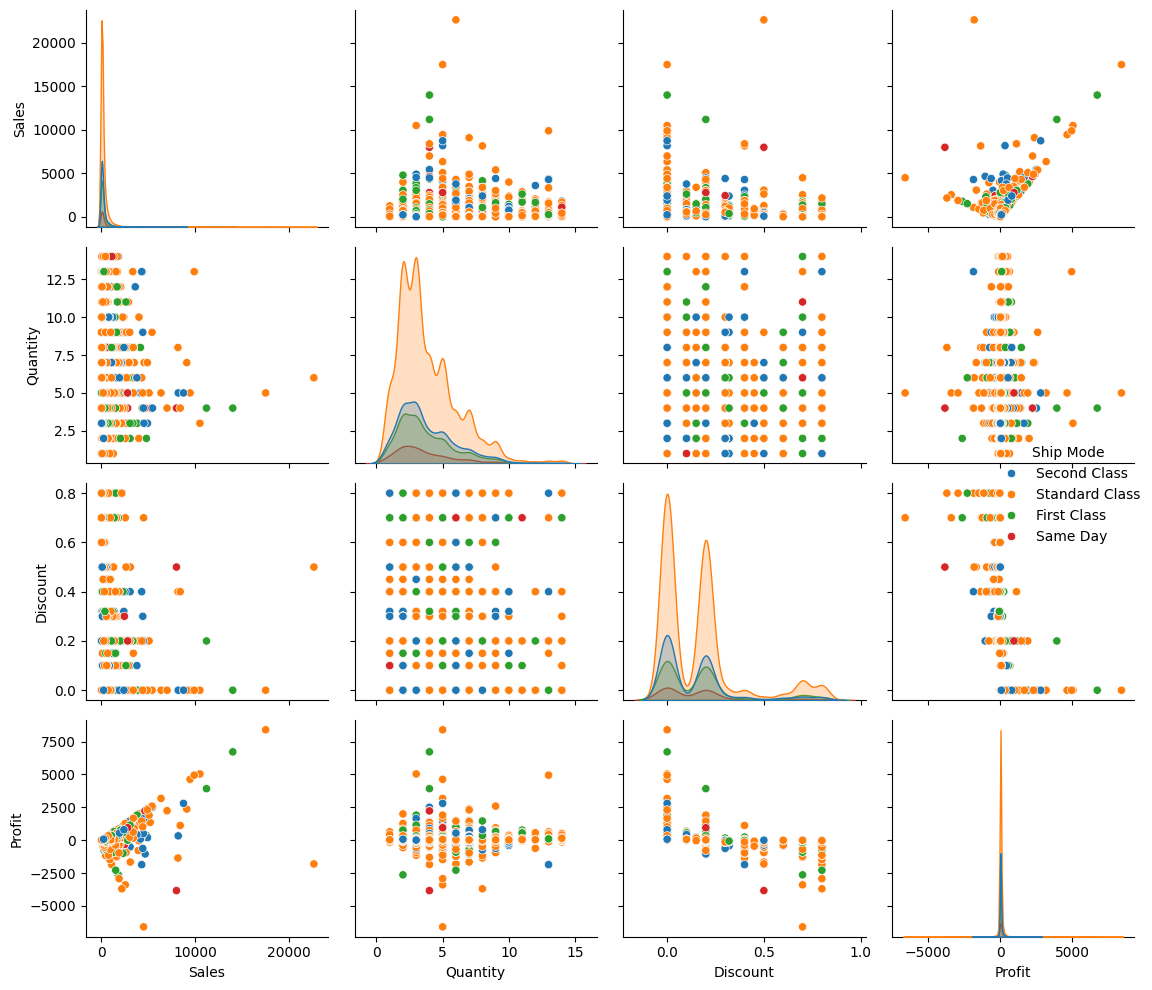

In [18]:
# pairwise relationships visualization with shipmode
sns.pairplot(data,hue="Ship Mode")
plt.tight_layout()

In [19]:
# counting ship mode categories
data["Ship Mode"].value_counts()

Ship Mode
Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: count, dtype: int64

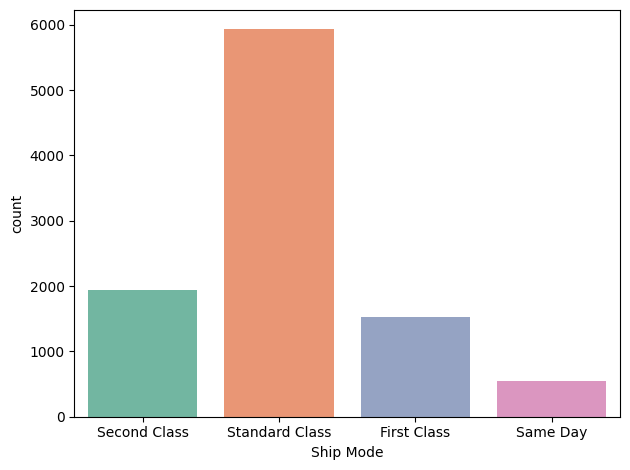

In [20]:
# count of ship mode categories
sns.countplot(data,x="Ship Mode",palette="Set2")
plt.tight_layout()

* Most opted Ship Mode: Standard Class* 
Least opted Ship Mode: Same Day

In [21]:
# grouping data by shipmode and summarizing profit and sales
df = data.groupby("Ship Mode")[["Profit","Sales"]].sum()
df

,Profit,Sales
Ship Mode,,
First Class,48910.4477,3.512746e+05
Same Day,15871.8869,1.283217e+05
Second Class,57425.5716,4.591240e+05
Standard Class,163889.6517,1.355879e+06


Text(0, 0.5, 'Profit and sales')

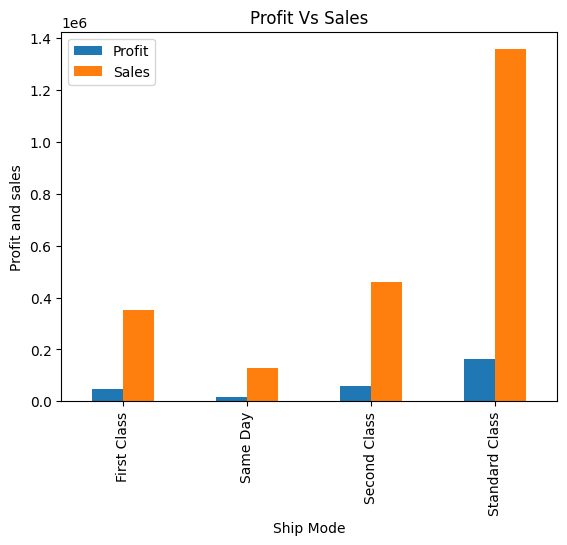

In [22]:
# visualizing profit and sales by ship mode
df.plot(kind= "bar")
plt.title("Profit Vs Sales")
plt.ylabel("Profit and sales")

* Maximum Profit and Sales : Standard Class* 
Minimum Profit and Sales : Same Day

In [23]:
# count of categories in the dataset
cat = data["Category"].value_counts()
cat

Category
Office Supplies    5986
Furniture          2114
Technology         1844
Name: count, dtype: int64

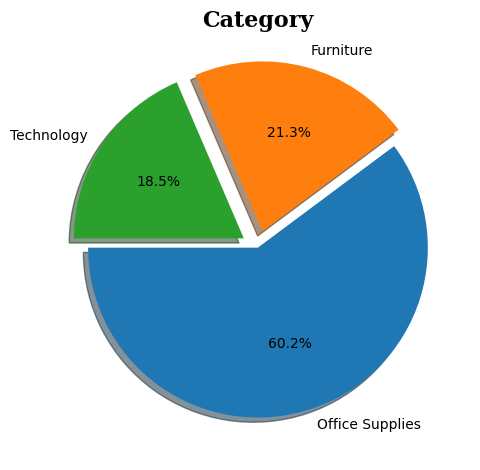

In [24]:
# distribution of categories in the dataset
plt.pie(x= cat,explode=[0,0.1,0.1],labels=["Office Supplies","Furniture","Technology"],autopct="%1.1f%%",shadow=True,startangle=180)
title_font = {'family':'serif','weight':'bold','size': 16}
plt.title("Category",fontdict=title_font)
plt.tight_layout()

Major distribution of business is in Office Supplies and Least in Technology

In [25]:
#calculating category wise Sales
cat_sales=data.groupby("Category").Sales.sum()
print(cat_sales)
#calculating category wise Profit
cat_pro=data.groupby("Category").Profit.sum()
print(cat_pro)

Category
Furniture          740568.6663
Office Supplies    718256.0700
Technology         835774.6410
Name: Sales, dtype: float64
Category
Furniture           18484.9459
Office Supplies    122196.0726
Technology         145416.5394
Name: Profit, dtype: float64


Text(0, 0.5, 'Total Sales and Profit')

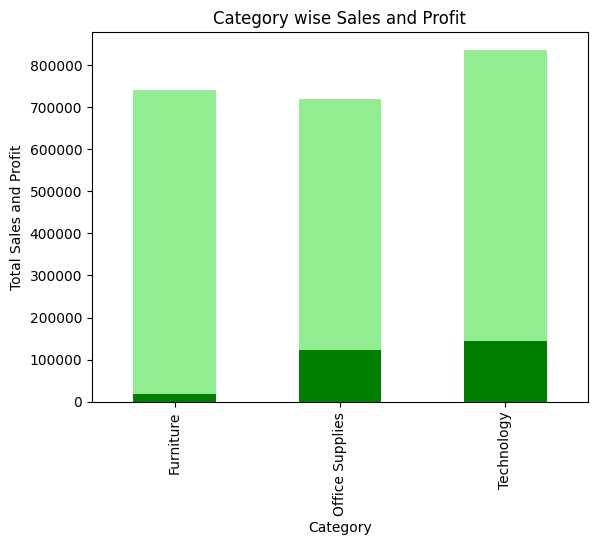

In [26]:
# visualizing category wise sales and profit
## sales
cat_sales.plot(kind="bar",color= "lightgreen")
## profitlig
cat_pro.plot(kind="bar",color= "green")
plt.title("Category wise Sales and Profit")
plt.ylabel("Total Sales and Profit")

* Maximum Profit and Sales in Category: Technology* 
Minimum Profit and Sales in Category: Office Supplies

### Sub Category

In [27]:
# count of sub-categories in the dataset
sub = data["Sub-Category"].value_counts()
sub

Sub-Category
Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

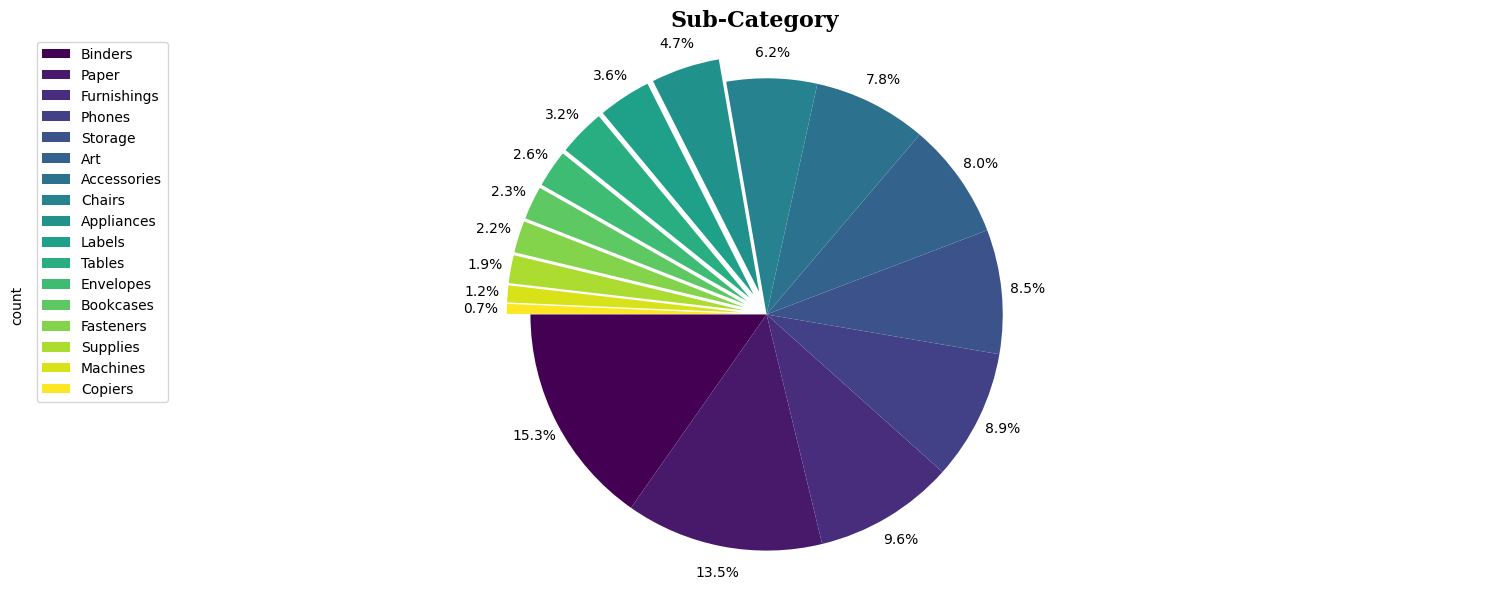

In [28]:
# distribution of sub-categories in the dataset
from matplotlib import cm
cmap = cm.get_cmap("viridis")
explode_list=[0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
sub.plot(kind = "pie",figsize=(15,6),autopct="%1.1f%%",startangle=180,pctdistance=1.11,cmap=cmap,labels= None,explode= explode_list )
title_font = {'family':'serif','weight':'bold','size': 16}
plt.title("Sub-Category",fontdict=title_font)
plt.axis("equal")
plt.legend(labels=sub.index,loc="upper left")
plt.tight_layout()

* Major distribution of business is in Binders, Paper and Furnishings* 
Least distribution of business is in Copiers, Machines and Supplies

### Category and Subcategory

In [29]:
# calculating total sales and profit by category and sub-category
x = data.groupby(["Category","Sub-Category"]).Sales.sum()
y = data.groupby(["Category","Sub-Category"]).Profit.sum()

### Sales

Text(0, 0.5, 'Sales')

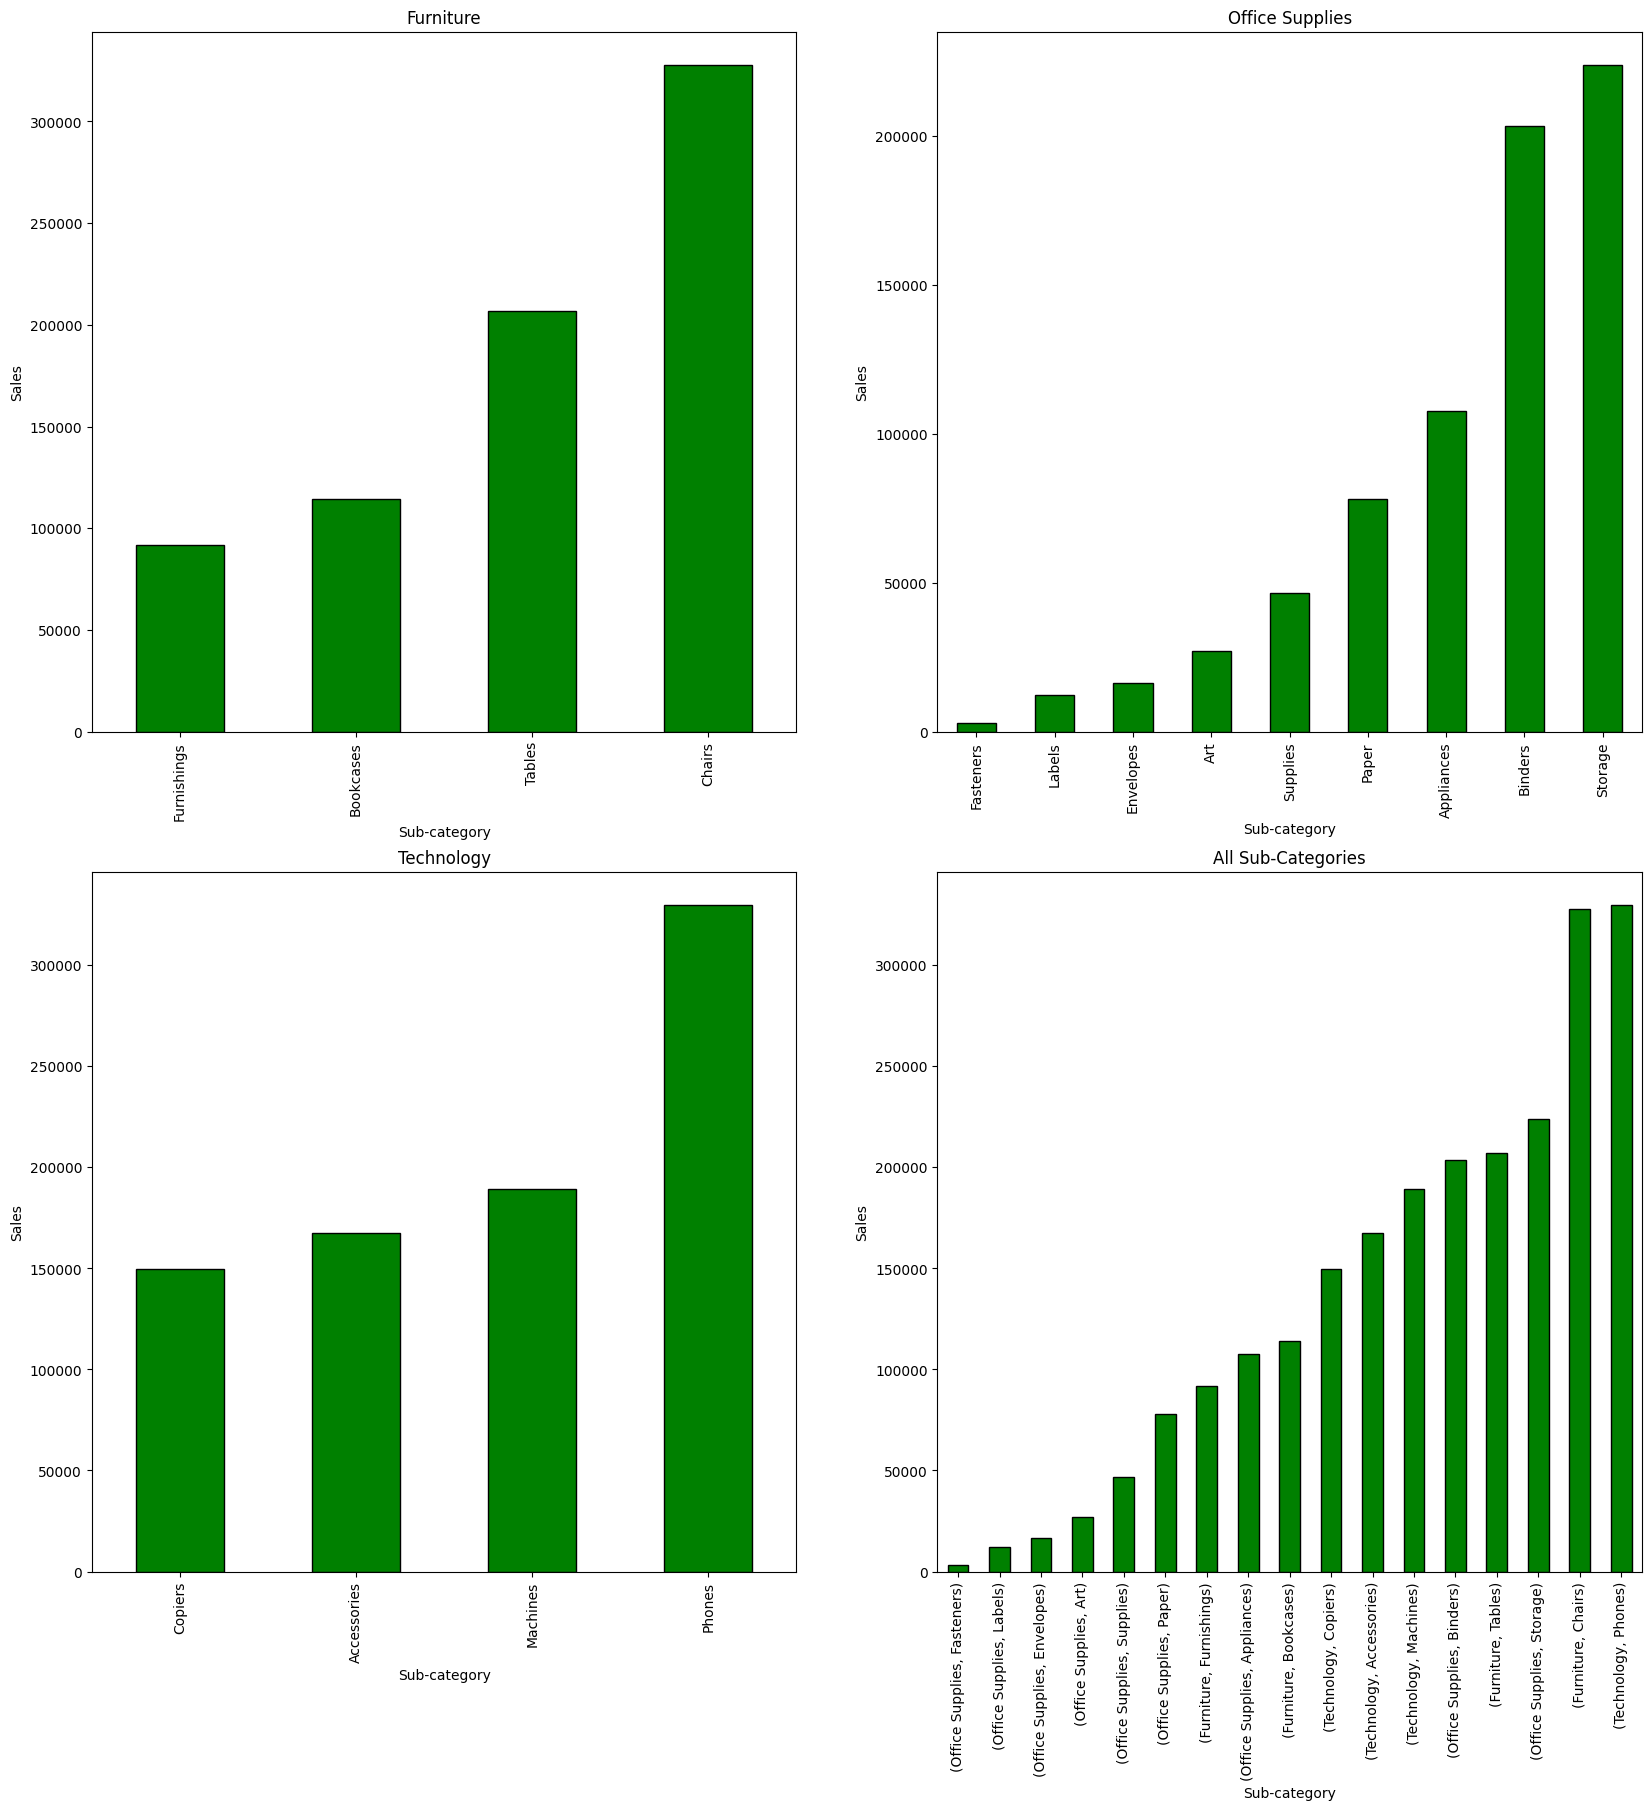

In [30]:
# visualizing sales by sub-category
plt.subplot(2,2,1)
x["Furniture"].sort_values().plot(kind= "bar",figsize=(20,20),color= "green", edgecolor="black")
plt.title("Furniture")
plt.xlabel("Sub-category")
plt.ylabel("Sales")
plt.subplot(2,2,2)
x["Office Supplies"].sort_values().plot(kind= "bar",figsize=(20,20),color= "green", edgecolor="black")
plt.title("Office Supplies")
plt.xlabel("Sub-category")
plt.ylabel("Sales")
plt.subplot(2,2,3)
x["Technology"].sort_values().plot(kind= "bar",figsize= (20,20),color= "green", edgecolor="black")
plt.title("Technology")
plt.xlabel("Sub-category")
plt.ylabel("Sales")
plt.subplot(2,2,4)
x.sort_values().plot(kind= "bar",figsize= (20,20),color= "green", edgecolor="black")
plt.title("All Sub-Categories")
plt.xlabel("Sub-category")
plt.ylabel("Sales")

* Maximum Sales in : Chairs(Furniture), Storage(Office Supplies) and Phones(Technology)* 
Minimum Sales in : Fasteners, Labels and Envelopes (Office Supplies)

### Profit

Text(0, 0.5, 'Profit')

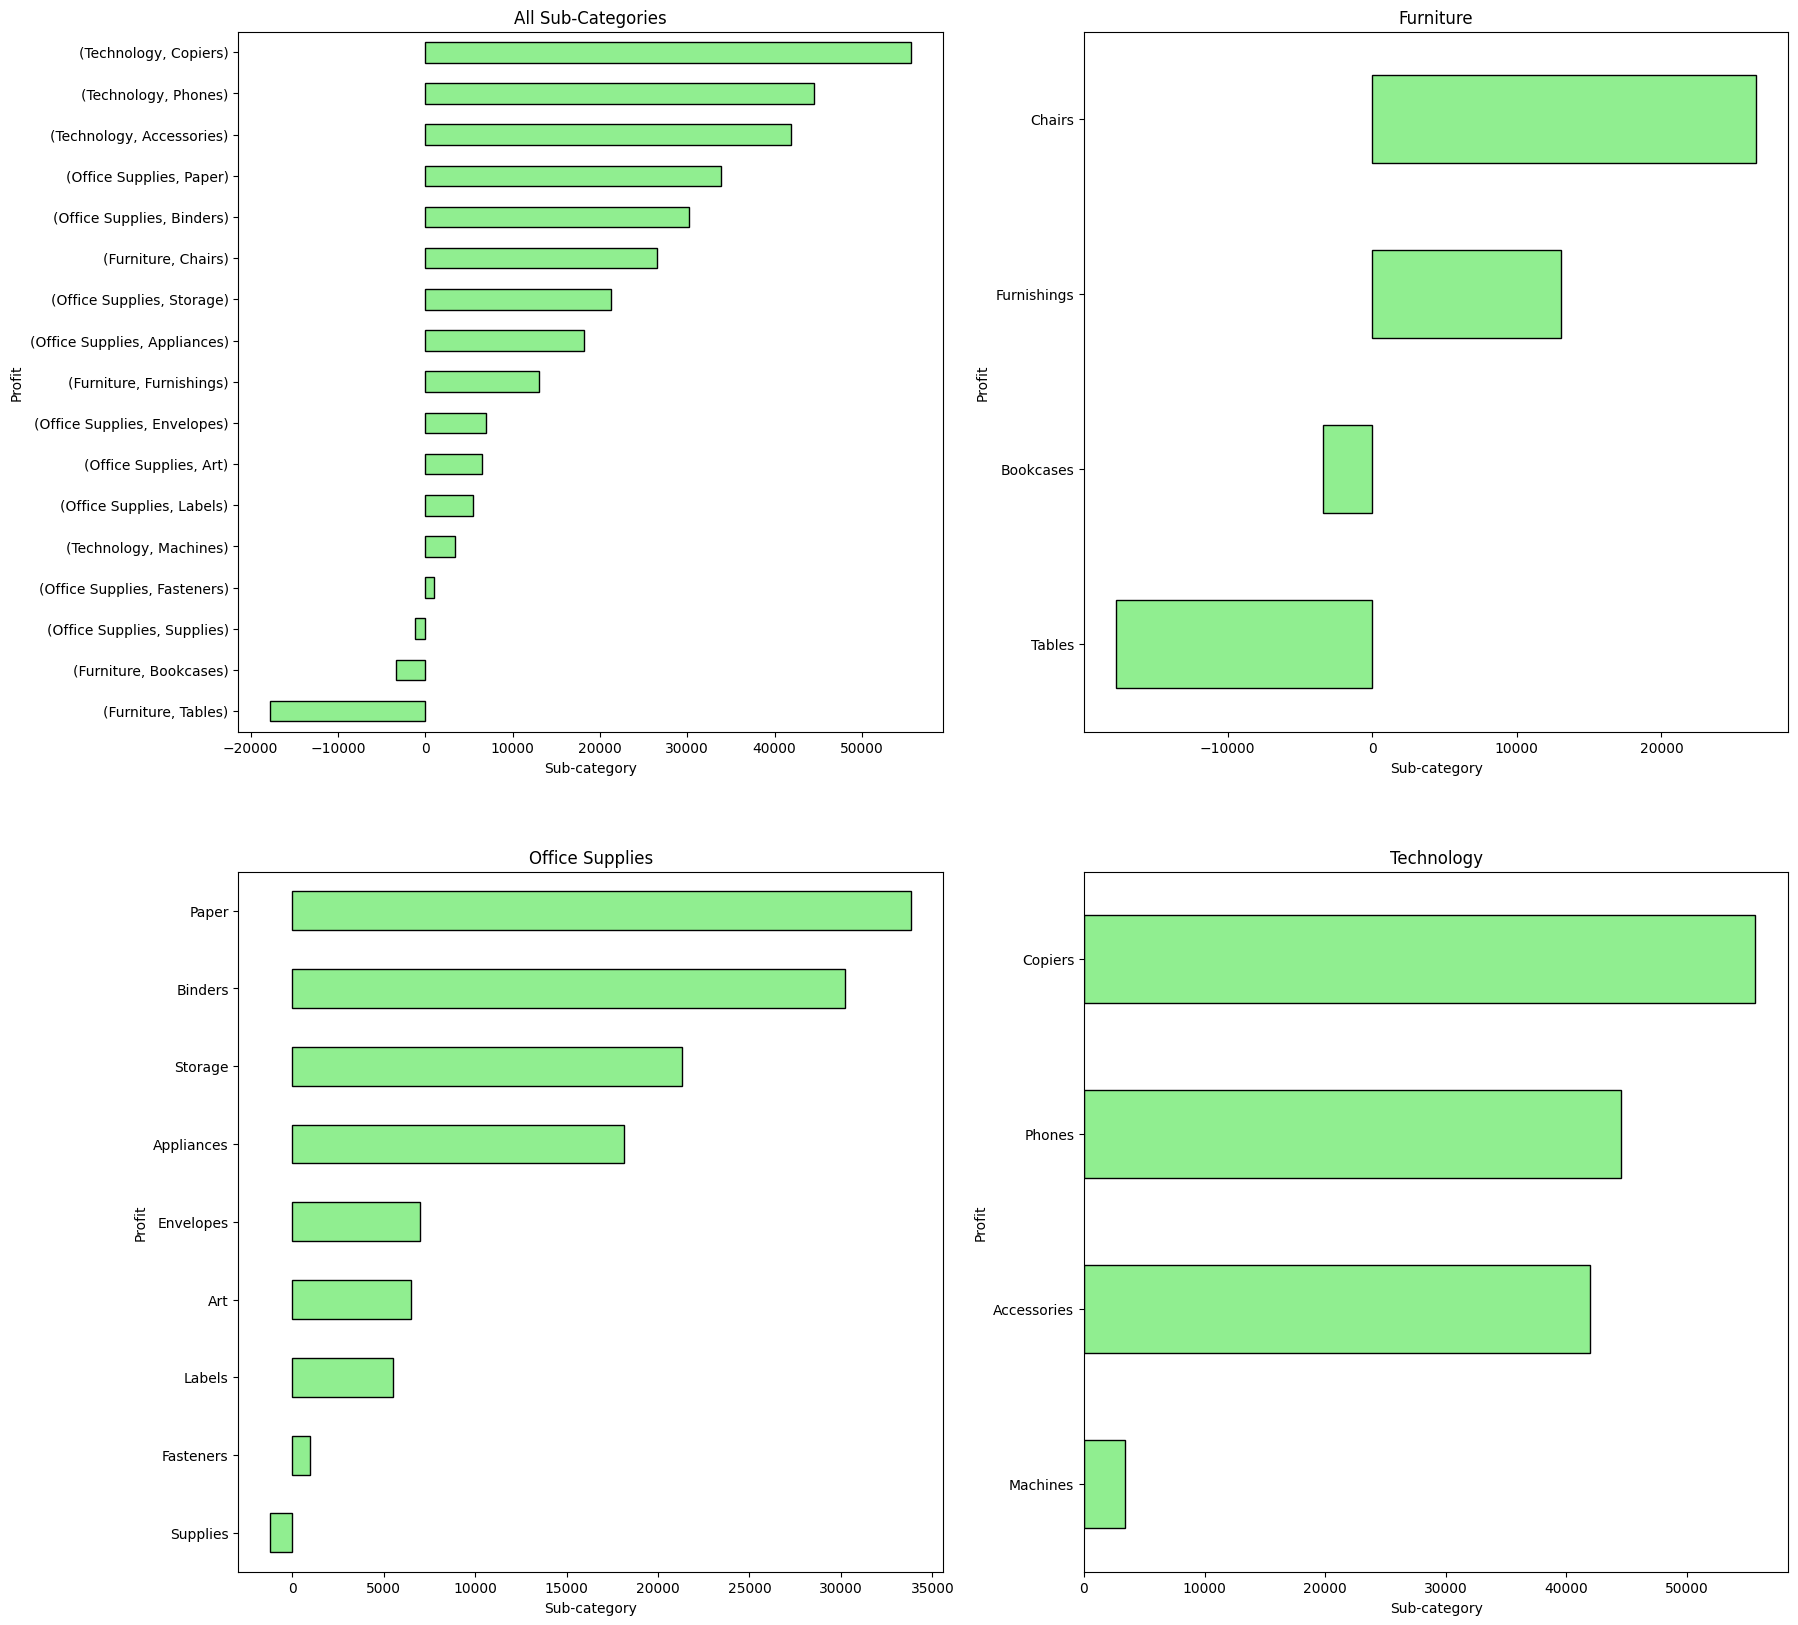

In [31]:
# visualizing profit by sub-category
plt.subplot(2,2,2)
y["Furniture"].sort_values().plot(kind= "barh",figsize=(20,20),color= "lightgreen", edgecolor="black")
plt.title("Furniture")
plt.xlabel("Sub-category")
plt.ylabel("Profit")
plt.subplot(2,2,3)
y["Office Supplies"].sort_values().plot(kind= "barh",figsize=(20,20),color= "lightgreen", edgecolor="black")
plt.title("Office Supplies")
plt.xlabel("Sub-category")
plt.ylabel("Profit")
plt.subplot(2,2,4)
y["Technology"].sort_values().plot(kind= "barh",figsize= (20,20),color= "lightgreen", edgecolor="black")
plt.title("Technology")
plt.xlabel("Sub-category")
plt.ylabel("Profit")
plt.subplot(2,2,1)
y.sort_values().plot(kind= "barh",figsize= (20,20),color= "lightgreen", edgecolor="black")
plt.title("All Sub-Categories")
plt.xlabel("Sub-category")
plt.ylabel("Profit")

* Maximum Profit in : Copiers, Phones and Accessories (Technology)* 
Loss in : Tables and Bookcases (Furniture) and Supplies (Office Supplies)

### Sales and Profit Combined

Text(0, 0.5, 'Profit')

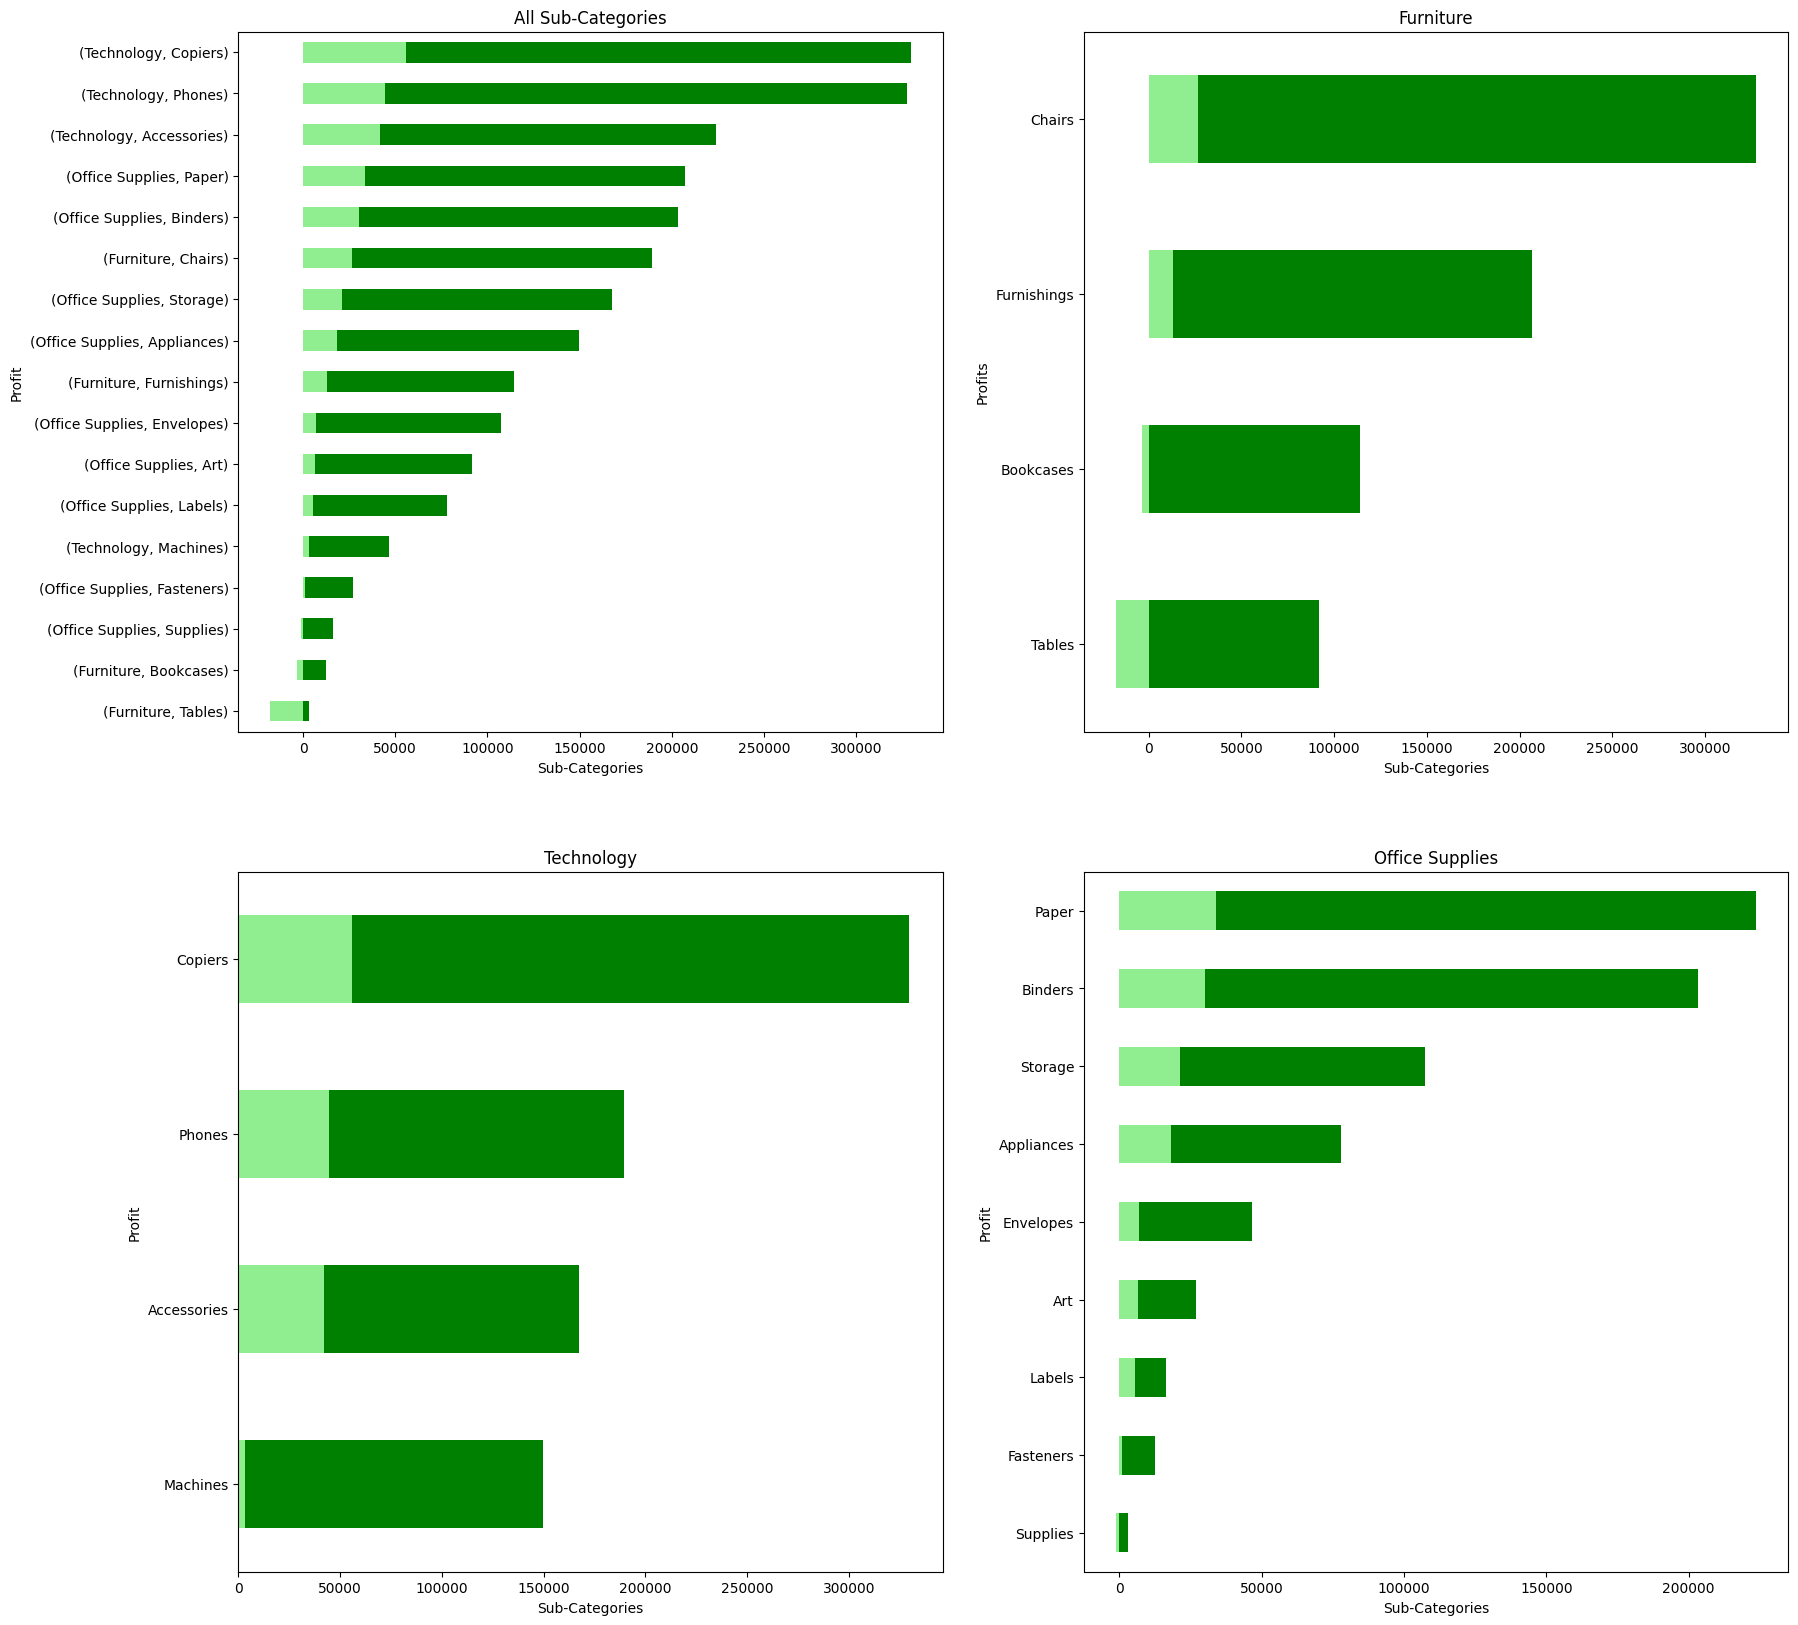

In [32]:
# visualizing sales and profit by sub-category
# sales
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)
## Furniture
x["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,color= "green")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")
## Technology
x["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2,color= "green")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Sales")
## Office Supplies
x["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3,color= "green")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")
## Total
x.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0,color= "green")
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Sales")
# Profit
## Furniture
y["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,color="lightgreen")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Profits")
## Technology
y["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2,color="lightgreen")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Profit")
## Office Supplies
y["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3,color="lightgreen")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profit")
## Total
y.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0,color="lightgreen")
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Profit")

* Highest Sales and Profit in : Copiers, Phones and Accessories (Technology)* 
Lowest Sales and Profit in : Tables, Bookcases (Furniture) and Supplies (Office Supplies))

In [33]:
# count of states in the dataset
state = data["State"].value_counts()
state

State
California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

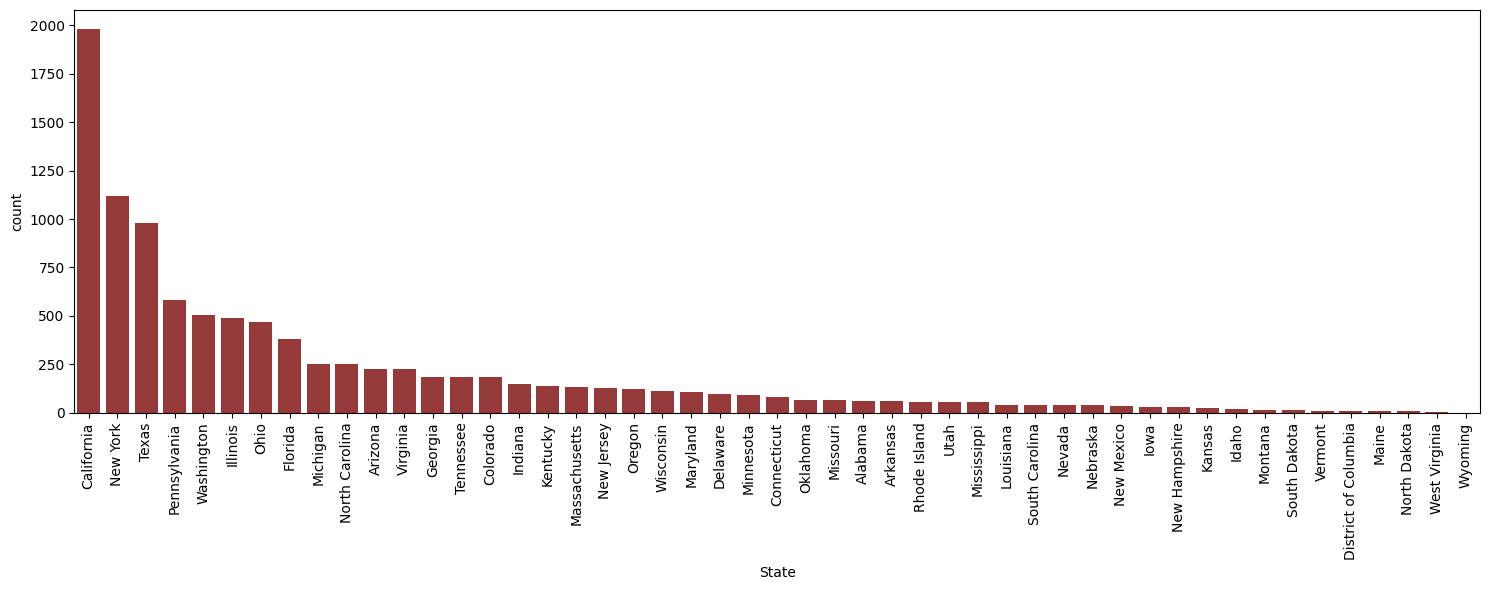

In [34]:
# visualizing count of states
plt.figure(figsize=(15,6))
sns.barplot(state,color="brown")
plt.xticks(rotation= 90)
plt.tight_layout()

* Most buyers belong to "California", "New York" and "Texas"* 
Leas  buyers belong to "Wyoming", "West Virginia" and "North Dakota"

In [35]:
# calculating total sales and profit by state
x = data.groupby(["State"]).Sales.sum()
y = data.groupby(["State"]).Profit.sum()

Text(0, 0.5, 'Profit')

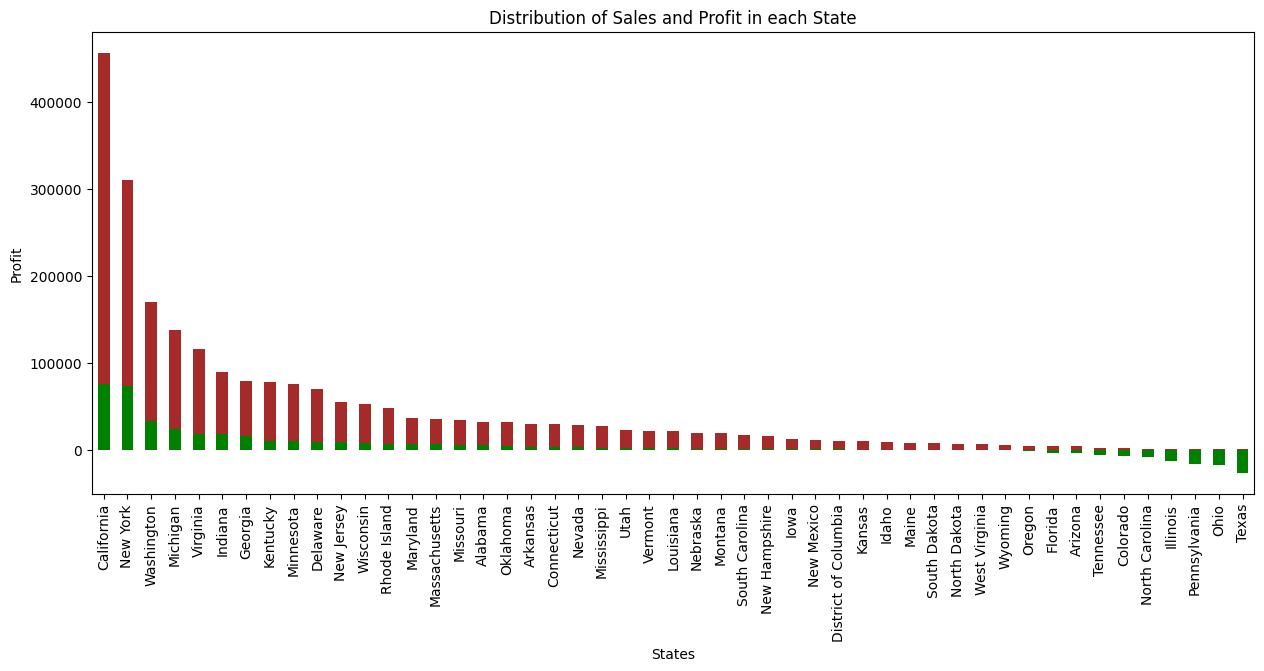

In [36]:
#State wise Distribution of Sales
x.sort_values(ascending=False).plot(kind="bar",figsize=(15,6),color= "brown")
plt.xlabel("States")
plt.ylabel("Sales")
#State wise Distribution of Profit
y.sort_values(ascending=False).plot(kind="bar",figsize=(15,6),color="green")
plt.title("Distribution of Sales and Profit in each State")
plt.xlabel("States")
plt.ylabel("Profit")

* Maximum Sales and Profit in cities: "California" and "New York"* 
Minimum Sales and Profit in cities: "Oregon", "Florida" , "Arizona", "Tennessee", "Colorado", "North Carolina", "Ilionis", "Pennsylvania", "Ohio" and "Texas"

### Segment

In [37]:
# count of segments in the dataset
seg = data["Segment"].value_counts()
seg

Segment
Consumer       5160
Corporate      3008
Home Office    1776
Name: count, dtype: int64

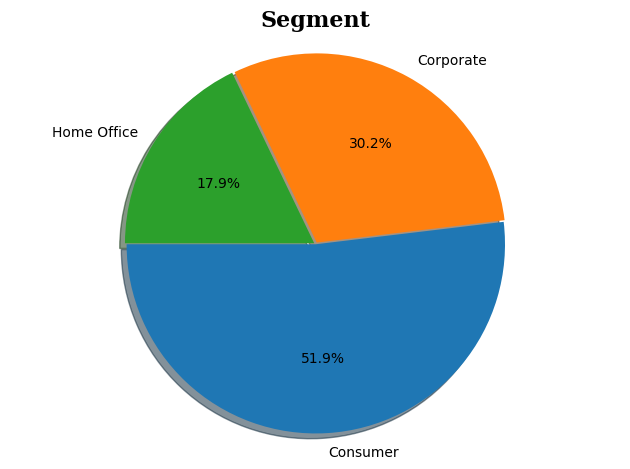

In [38]:
# distribution of customers by segment
plt.pie(seg,labels=["Consumer","Corporate","Home Office"],autopct="%1.1f%%",shadow=True,explode=[0,0.01,0.01],startangle=180)
title_font = {'family':'serif','weight':'bold','size': 16}
plt.title("Segment",fontdict=title_font)
plt.axis("equal")
plt.tight_layout()

Major business distribution in Consumer Segment and Least in Home Office

### Sales and Profit in different segments

In [39]:
# calculating total sales and profit by customer segment
seg_SP = data.groupby("Segment")[["Sales","Profit"]].sum()
seg_SP

,Sales,Profit
Segment,,
Consumer,1.159418e+06,133939.5218
Corporate,7.059702e+05,91911.1606
Home Office,4.292117e+05,60246.8755


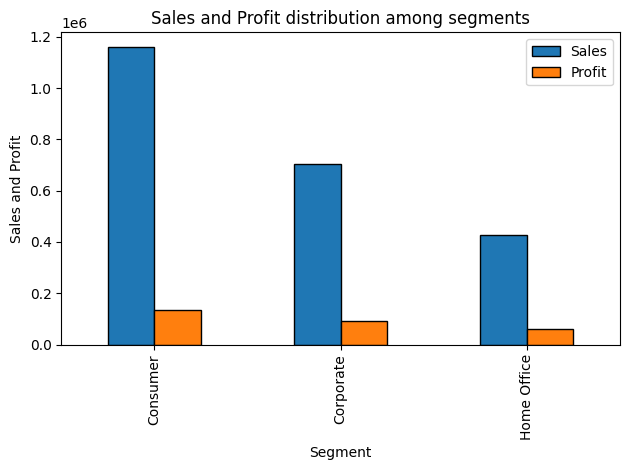

In [40]:
# visualizing sales and profit distribution among segments
seg_SP.plot(kind= "bar",edgecolor= "black")
plt.ylabel("Sales and Profit")
plt.xlabel("Segment")
plt.title("Sales and Profit distribution among segments")
plt.tight_layout()

Most Profit and Sales in Consumer segment and least in Home Office

### Region

In [41]:
reg = data["Region"].value_counts()
reg

Region
West       3177
East       2832
Central    2315
South      1620
Name: count, dtype: int64

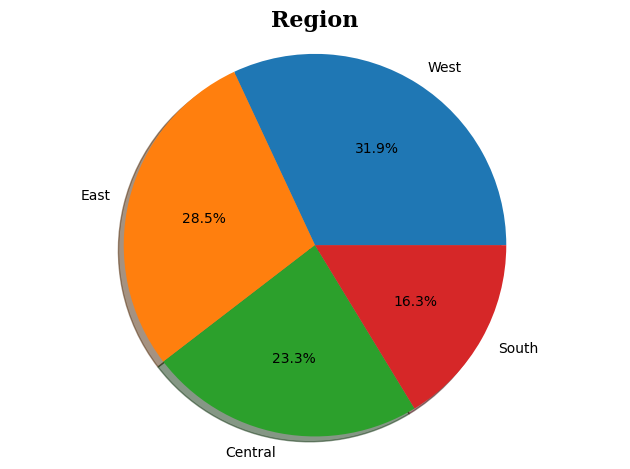

In [42]:
# distribution of orders by region
plt.pie(reg,labels=["West","East","Central","South"],autopct="%1.1f%%",shadow=True)
title_font = {'family':'serif','weight':'bold','size': 16}
plt.title("Region",fontdict=title_font)
plt.axis("equal")
plt.tight_layout()

Company deals majorly in Western Region and least in Southern Region

In [43]:
# calculating total sales and profit by region
reg_SP = data.groupby("Region")[["Sales","Profit"]].sum()
reg_SP

,Sales,Profit
Region,,
Central,500724.2708,39662.0474
East,677843.9080,91471.0909
South,391721.9050,46749.4303
West,724309.2935,108214.9893


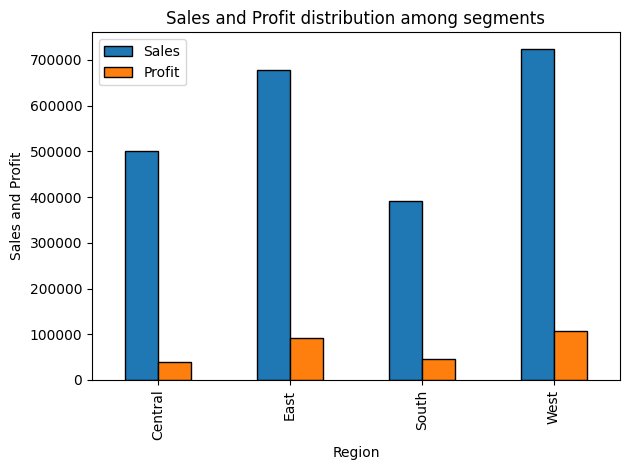

In [44]:
# visualizing sales and profit distribution among regions 
reg_SP.plot(kind="bar",edgecolor="black")
plt.ylabel("Sales and Profit")
plt.xlabel("Region")
plt.title("Sales and Profit distribution among segments")
plt.tight_layout()

More Profit from Western and Eastern Regions whereas lesser profits from Central and Southern regions

### Region wise Ship Mode

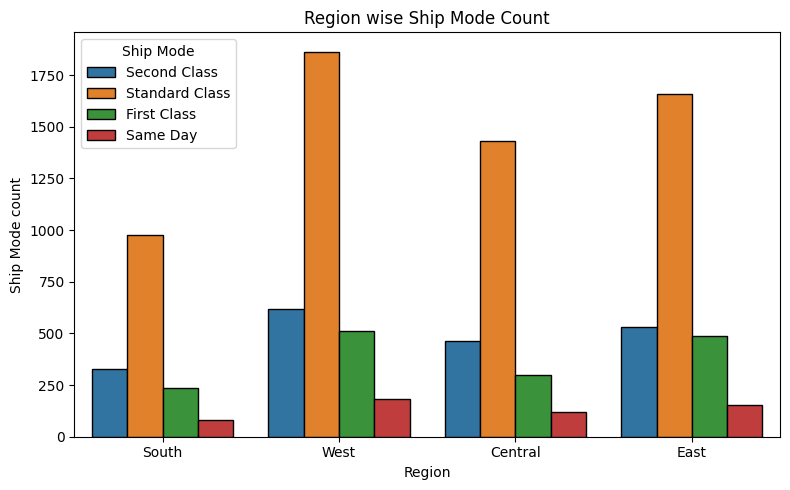

In [45]:
# count of ship modes by region
plt.figure(figsize=(8,5))
sns.countplot(data= data,x="Region",hue="Ship Mode",edgecolor="black")
plt.title("Region wise Ship Mode Count")
plt.ylabel("Ship Mode count")
plt.tight_layout()

* Most opted mode : Standard Class and* 
Least opted mode: Same Day

### Relation between Profit and Discount

In [46]:
# calculating correlation between discount and profit
data["Discount"].corr(data["Profit"])

-0.21993898249765045

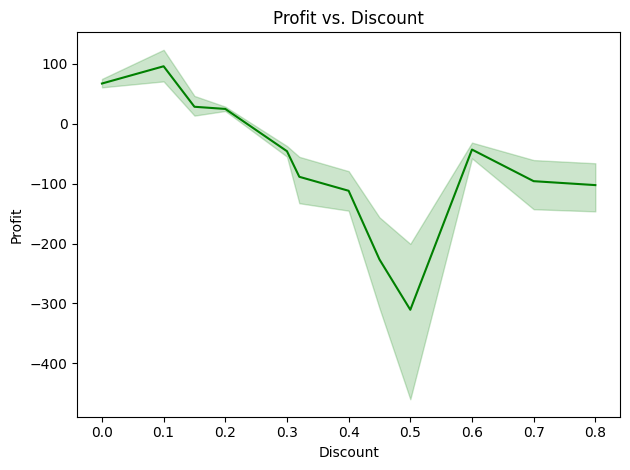

In [47]:
# visualizing profit Vs discount relationship
sns.lineplot(data,x="Discount",y="Profit",color="green")
plt.title("Profit vs. Discount")
plt.tight_layout()

Profit and Discount have negative relation,i.e, when one increases the other decreases

### Relation among Sales, Profit and Discount

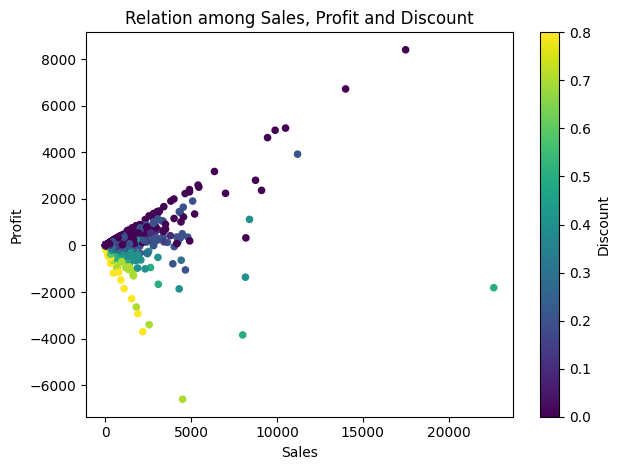

In [48]:
# scatterplot sales Vs Profit colored by discount
data.plot(kind="scatter",x="Sales",y="Profit",c="Discount",colormap="viridis")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Relation among Sales, Profit and Discount")
plt.tight_layout()

* As Discount increases Profit decreases* 
Discount and Sales have a lesser relation but Sales also decrease with increasing discount

### Conclusion

##### Reduce Discounts: 
Decrease discount rates to improve overall profitability and sales performance.


##### Prioritize Standard Class:
Focus resources on Standard Class shipping for higher profitability and sales.


##### Shift to Technology: 
Redirect efforts towards the Technology category for increased profitability, particularly in Copiers, Phones, and Accessories.

##### Target Weak Cities: 
Enhance sales efforts in underperforming cities like Oregon, Florida, Arizona, etc., to improve overall profitability.

##### Leverage Top Cities:
Capitalize on high-performing cities such as California and New York with the highest sales and profits.

##### Promote Consumer Segment:
Encourage sales to the Consumer segment, which generates the highest sales and profit margins.

##### Focus on Western and Eastern Regions: 
Concentrate efforts on the Western and Eastern regions for significant sales and profit growth.